__손글씨 MNIST를 사용하여 다중클래스 분류하는 모델 만들기 (다층 퍼셉트론 ~ 컨볼루션 신경망 모델)__

### 1. 데이터셋 준비

In [1]:
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [57]:
# 다층 퍼셉트론 모델을 위한 데이터셋
width=28;height=28

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

In [3]:
# 컨볼루션 신경망 모델

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
# x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

In [58]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [59]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

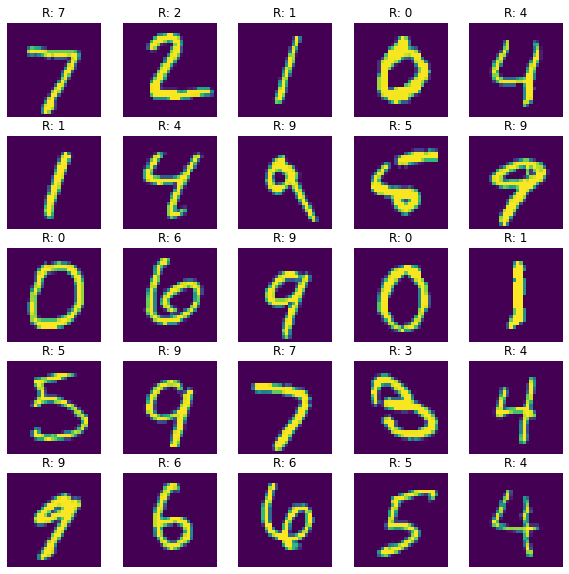

In [6]:
plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i]))
    sub_plt.set_title(sub_plt_title)
    
plt.show()

### 2. 모델 준비

#### 1) 다층퍼셉트론 신경망 모델

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [62]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6964 - accuracy: 0.8142 - val_loss: 0.2991 - val_accuracy: 0.9126
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2786 - accuracy: 0.9195 - val_loss: 0.2287 - val_accuracy: 0.9353
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2194 - accuracy: 0.9366 - val_loss: 0.1925 - val_accuracy: 0.9464
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1816 - accuracy: 0.9477 - val_loss: 0.1610 - val_accuracy: 0.9548
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1552 - accuracy: 0.9554 - val_loss: 0.1475 - val_accuracy: 0.9592
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1348 - accuracy: 0.9609 - val_loss: 0.1305 - val_accuracy: 0.9662
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1182 - accuracy: 0.9662 - val_loss: 0.1214 - val_accuracy:

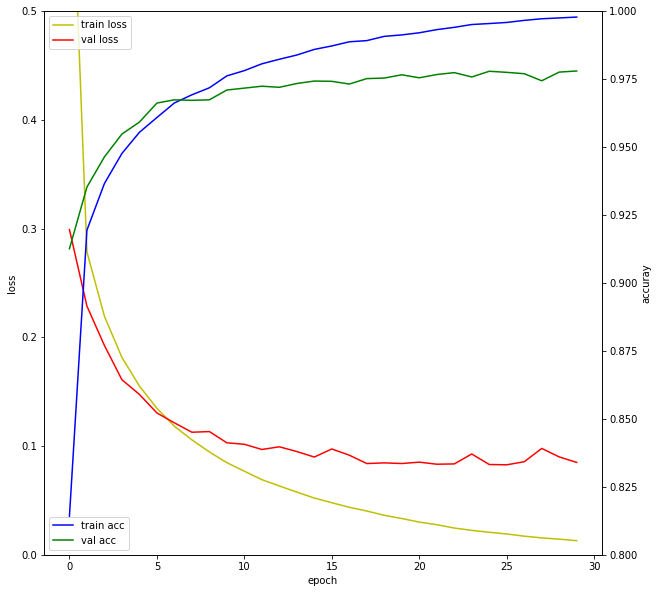

In [63]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [64]:
# 모델 평가하기

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9762
## evaluation loss and metrics ##
[0.07867781817913055, 0.9761999845504761]


In [65]:
# 모델 사용하기 (예측이 맞지 않는 데이터만 시각화해보기)

yhat_test = model.predict(x_test, batch_size=32)

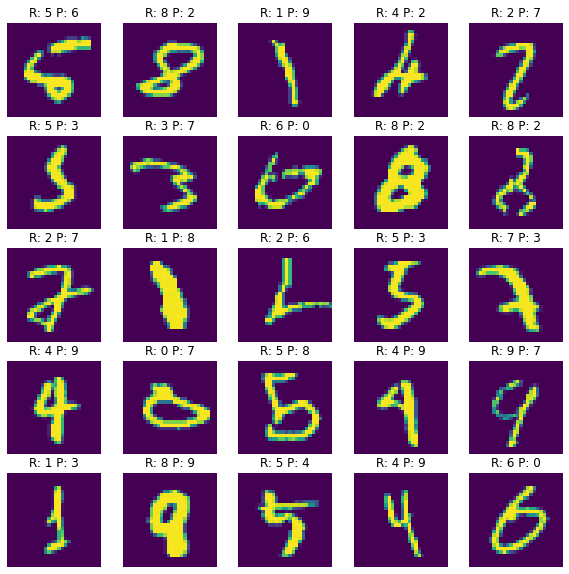

In [66]:
plt_row=5; plt_col=5
plt.rcParams['figure.figsize'] = (10, 10)
f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1
    cnt += 1
    
plt.show()

#### 2) 컨볼루션 신경망 모델

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [33]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 24s 16ms/step - loss: 0.5699 - accuracy: 0.8317 - val_loss: 0.2244 - val_accuracy: 0.9349
Epoch 2/30
1563/1563 [==============================] - 33s 21ms/step - loss: 0.1614 - accuracy: 0.9504 - val_loss: 0.1347 - val_accuracy: 0.9602
Epoch 3/30
1563/1563 [==============================] - 35s 22ms/step - loss: 0.1104 - accuracy: 0.9659 - val_loss: 0.0973 - val_accuracy: 0.9693
Epoch 4/30
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0864 - accuracy: 0.9737 - val_loss: 0.0728 - val_accuracy: 0.9790
Epoch 5/30
1563/1563 [==============================] - 32s 20ms/step - loss: 0.0723 - accuracy: 0.9770 - val_loss: 0.0780 - val_accuracy: 0.9779
Epoch 6/30
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.0625 - val_accuracy: 0.9835
Epoch 7/30
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.0587 -

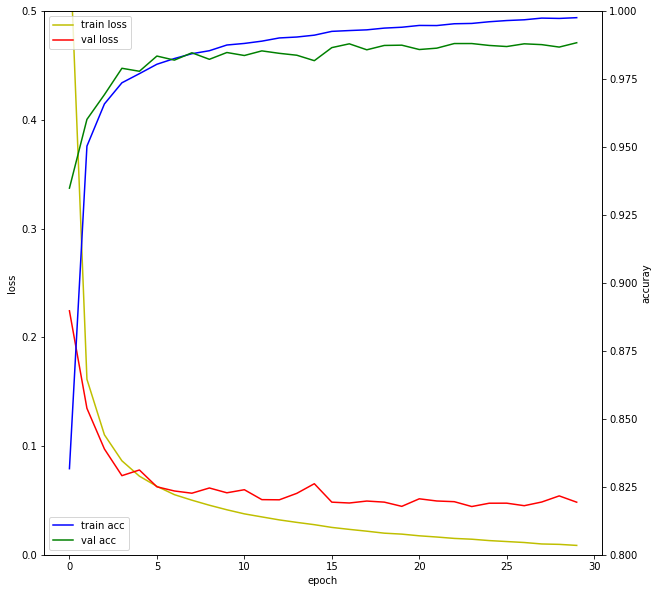

In [34]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [35]:
# 모델 평가하기

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 2s 7ms/step - loss: 0.0357 - accuracy: 0.9882
## evaluation loss and metrics ##
[0.035725176334381104, 0.9882000088691711]


In [36]:
# 모델 사용하기 (예측이 맞지 않는 데이터만 시각화해보기)

yhat_test = model.predict(x_test, batch_size=32)

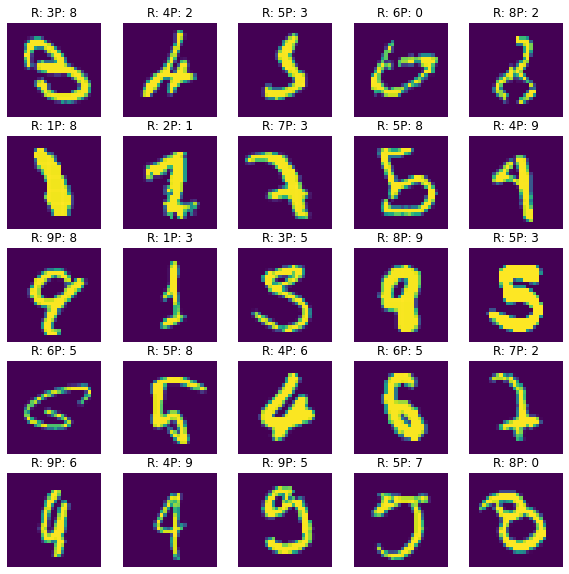

In [38]:
plt_row = 5;plt_col = 5
plt.rcParams['figure.figsize'] = (10, 10)
f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + 'P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)
    
    i += 1
    cnt += 1
    
plt.show()

#### 3) 깊은 컨볼루션 신경망 모델

In [44]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [46]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 149s 96ms/step - loss: 0.9095 - accuracy: 0.6917 - val_loss: 0.1620 - val_accuracy: 0.9509
Epoch 2/30
1563/1563 [==============================] - 123s 78ms/step - loss: 0.2393 - accuracy: 0.9260 - val_loss: 0.0999 - val_accuracy: 0.9694
Epoch 3/30
1563/1563 [==============================] - 128s 82ms/step - loss: 0.1757 - accuracy: 0.9464 - val_loss: 0.0753 - val_accuracy: 0.9780
Epoch 4/30
1563/1563 [==============================] - 121s 78ms/step - loss: 0.1438 - accuracy: 0.9555 - val_loss: 0.0647 - val_accuracy: 0.9815
Epoch 5/30
1563/1563 [==============================] - 161s 103ms/step - loss: 0.1211 - accuracy: 0.9621 - val_loss: 0.0594 - val_accuracy: 0.9831
Epoch 6/30
1563/1563 [==============================] - 152s 98ms/step - loss: 0.1114 - accuracy: 0.9657 - val_loss: 0.0550 - val_accuracy: 0.9840
Epoch 7/30
1563/1563 [==============================] - 140s 89ms/step - loss: 0.0996 - accuracy: 0.9693 - val_loss: 

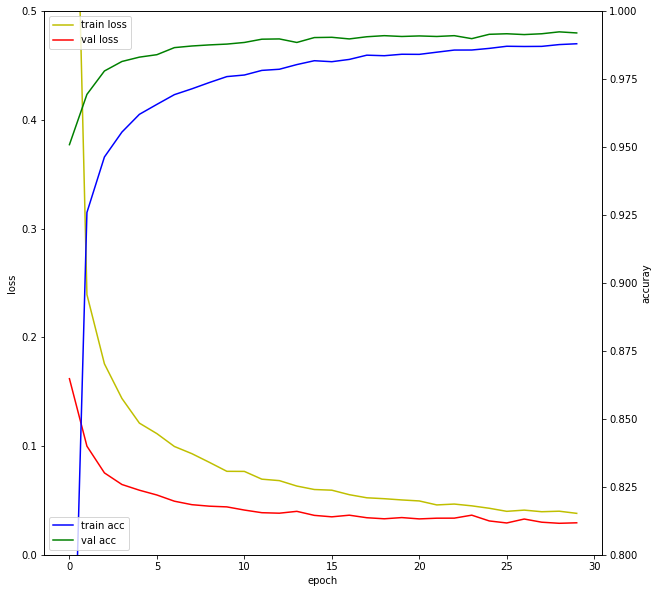

In [47]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [48]:
# 모델 평가하기

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 4s 13ms/step - loss: 0.0205 - accuracy: 0.9931
## evaluation loss and metrics ##
[0.02049703150987625, 0.9930999875068665]


In [49]:
# 모델 사용하기 (예측이 맞지 않는 데이터만 시각화해보기)

yhat_test = model.predict(x_test, batch_size=32)

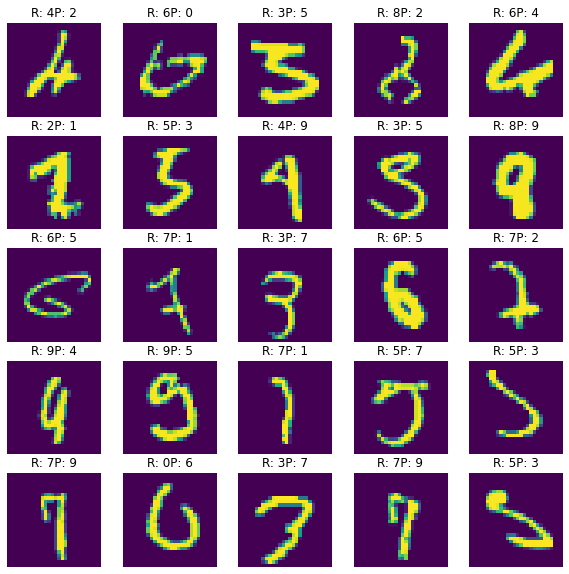

In [50]:
plt_row = 5;plt_col = 5
plt.rcParams['figure.figsize'] = (10, 10)
f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + 'P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)
    
    i += 1
    cnt += 1
    
plt.show()